<a href="https://colab.research.google.com/github/AndreyKuratov/project_mldm_21/blob/main/MLDM_project_prepare_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
!cp /content/drive/MyDrive/MLDM_comp/kaggle.json /content/

In [ ]:
  # Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c rfcx-species-audio-detection

100% 49.7G/49.7G [07:12<00:00, 180MB/s]
100% 49.7G/49.7G [07:13<00:00, 123MB/s]


In [ ]:
!mkdir /content/data	
!unzip /content/rfcx-species-audio-detection.zip -d /content/data

In [ ]:
!mkdir /content/drive/MyDrive/MLDM_proj

In [ ]:
!unzip /content/rfcx-species-audio-detection.zip -d /content/drive/MyDrive/MLDM_proj

In [ ]:
!rm /content/rfcx-species-audio-detection.zip

# Work with Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as signal
import os
import tqdm

In [3]:
common_dir = '/content/drive/MyDrive/MLDM_proj/'

In [4]:
 # list of train files
dir = common_dir + 'train/'
arr_files = os.listdir(dir)
arr_files[:10]

['ca06bba74.flac',
 'ca0bf5f45.flac',
 'ca8256b82.flac',
 'ca5018f35.flac',
 'ca27aadbb.flac',
 'ca4a30955.flac',
 'ca3f20e1d.flac',
 'ca8192152.flac',
 'ca3ef87e7.flac',
 'caf300f6f.flac']

In [5]:
   # list of names
arr_names = [x[:-5] for x in arr_files]
arr_names[:10]

['ca06bba74',
 'ca0bf5f45',
 'ca8256b82',
 'ca5018f35',
 'ca27aadbb',
 'ca4a30955',
 'ca3f20e1d',
 'ca8192152',
 'ca3ef87e7',
 'caf300f6f']

In [6]:
data_pd = pd.read_csv(common_dir + 'train_fp.csv')

### Show data

     recording_id  species_id  songtype_id   t_min   f_min    t_max   f_max
6128    ca06bba74          18            1  17.792  3187.5  18.4853  5062.5


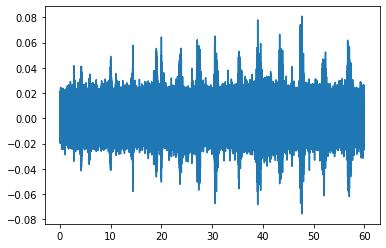

     recording_id  species_id  songtype_id  t_min   f_min    t_max   f_max
6129    ca0bf5f45          18            1   39.2  3187.5  39.8933  5062.5


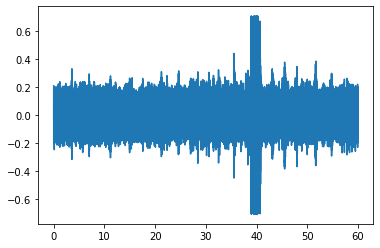

     recording_id  species_id  songtype_id    t_min    f_min   t_max   f_max
6140    ca8256b82           0            1  22.9013  5906.25  24.192  7500.0


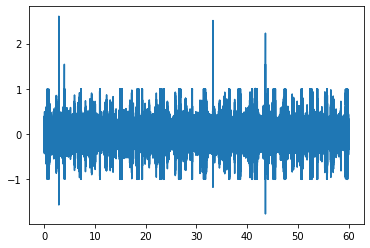

In [ ]:
for x in arr_files[:3]:
  data, samplerate = sf.read(dir + x)
  print(data_pd[data_pd['recording_id'] == x[:-5]])
  time = np.arange(len(data))/samplerate
  plt.plot(time, data);
  plt.show();

In [ ]:
data_pd.describe()

,species_id,songtype_id,t_min,f_min,t_max,f_max
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000
mean,12.138671,1.346999,28.627830,2827.996428,31.267911,6074.830415
std,7.068808,0.959535,17.461603,2515.604420,17.496989,3386.040304
min,0.000000,1.000000,0.010700,93.750000,0.768000,843.750000
25%,6.000000,1.000000,12.949300,947.460900,15.728000,3937.500000
50%,12.000000,1.000000,28.880000,2343.750000,31.541300,5250.000000
75%,18.000000,1.000000,44.065700,3843.750000,46.789300,7500.000000
max,23.000000,4.000000,59.301300,10687.500000,59.994700,13687.500000


### Spectrogram

In [ ]:
def plot_spectrogram(data, samplerate):
  freq, time, Sxx = signal.spectrogram(data, samplerate,  scaling='spectrum')
  # freq, time, Sxx = signal.spectrogram(data, samplerate,  scaling='spectrum', mode='phase')
  plt.figure()
  maximum = max(np.log(Sxx).flatten())
  minimum = min(np.log(Sxx).flatten())
  # plt.pcolormesh(time, freq, (np.log(Sxx) - minimum)/(maximum - minimum))
  plt.pcolormesh(time, freq, np.log(Sxx))
  # plt.pcolormesh(time, freq, Sxx)
  plt.colorbar()

    # add axis labels
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show();

     recording_id  species_id  songtype_id   t_min   f_min    t_max   f_max
6128    ca06bba74          18            1  17.792  3187.5  18.4853  5062.5


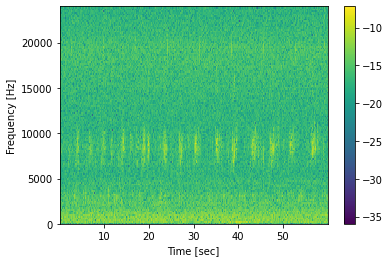

     recording_id  species_id  songtype_id  t_min   f_min    t_max   f_max
6129    ca0bf5f45          18            1   39.2  3187.5  39.8933  5062.5


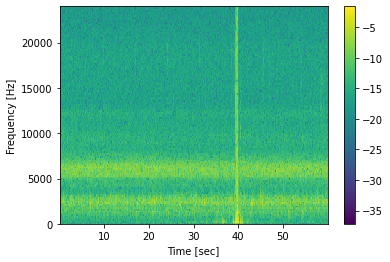

     recording_id  species_id  songtype_id    t_min    f_min   t_max   f_max
6140    ca8256b82           0            1  22.9013  5906.25  24.192  7500.0


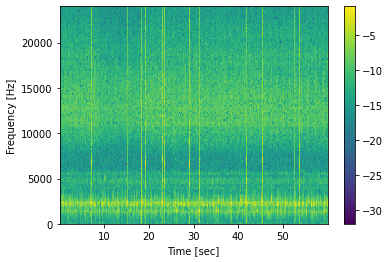

Empty DataFrame
Columns: [recording_id, species_id, songtype_id, t_min, f_min, t_max, f_max]
Index: []


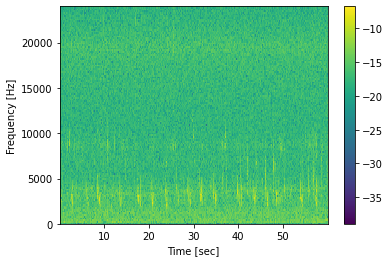

     recording_id  species_id  songtype_id    t_min    f_min    t_max   f_max
6130    ca27aadbb          21            1  34.7627  3281.25  35.8560  4125.0
6131    ca27aadbb           2            1  56.7467   468.75  58.5227  3000.0


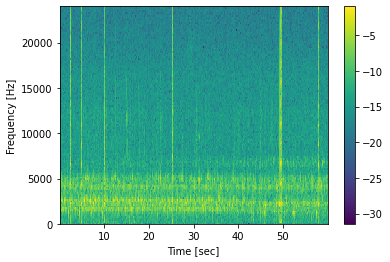

In [ ]:
for x in arr_files[:5]:
  data, samplerate = sf.read(dir + x)
  print(data_pd[data_pd['recording_id'] == x[:-5]])
  plot_spectrogram(data, samplerate)

In [ ]:
import librosa as lb 
import librosa.display

In [ ]:
def make_spectr(data, samplerate):
  n_fft = 2048 # number of samples per FFT (the duration of each slice)
  hop_length = 512 # shift

  stft = lb.core.stft(data, hop_length=hop_length, n_fft=n_fft)

  spectrogram = np.abs(stft)

# lb.display.waveplot(data, sr=samplerate)
# log_spectrogram = lb.amplitude_to_db(spectrogram)
  lb.display.specshow(spectrogram, sr=samplerate, hop_length=hop_length)
  plt.xlabel('Time') 
  plt.ylabel('Frequency')
  clb = plt.colorbar()
  clb.set_label('Amplitude')
  plt.show()

     recording_id  species_id  songtype_id   t_min   f_min    t_max   f_max
6128    ca06bba74          18            1  17.792  3187.5  18.4853  5062.5


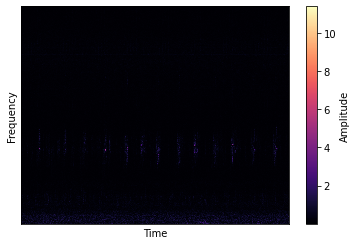

     recording_id  species_id  songtype_id  t_min   f_min    t_max   f_max
6129    ca0bf5f45          18            1   39.2  3187.5  39.8933  5062.5


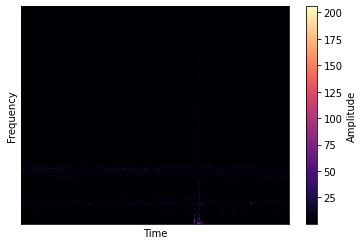

     recording_id  species_id  songtype_id    t_min    f_min   t_max   f_max
6140    ca8256b82           0            1  22.9013  5906.25  24.192  7500.0


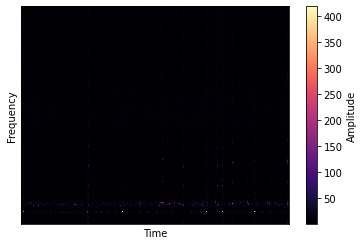

Empty DataFrame
Columns: [recording_id, species_id, songtype_id, t_min, f_min, t_max, f_max]
Index: []


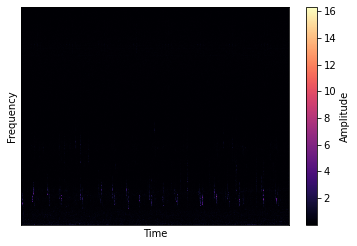

     recording_id  species_id  songtype_id    t_min    f_min    t_max   f_max
6130    ca27aadbb          21            1  34.7627  3281.25  35.8560  4125.0
6131    ca27aadbb           2            1  56.7467   468.75  58.5227  3000.0


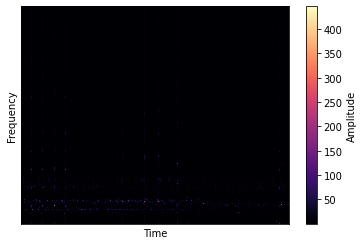

In [ ]:
for x in arr_files[:5]:
  data, samplerate = sf.read(dir + x)
  print(data_pd[data_pd['recording_id'] == x[:-5]])
  make_spectr(data, samplerate)

In [ ]:
def make_log_spectr(data, samplerate):
  n_fft = 2048 # number of samples per FFT (the duration of each slice)
  hop_length = 512 # shift

  stft = lb.core.stft(data, hop_length=hop_length, n_fft=n_fft)

  spectrogram = np.abs(stft)

# lb.display.waveplot(data, sr=samplerate)
  log_spectrogram = lb.amplitude_to_db(spectrogram)
  lb.display.specshow(log_spectrogram, sr=samplerate, hop_length=hop_length)
  plt.xlabel('Time') 
  plt.ylabel('Frequency')
  clb = plt.colorbar()
  clb.set_label('Amplitude')
  plt.show()

     recording_id  species_id  songtype_id   t_min   f_min    t_max   f_max
6128    ca06bba74          18            1  17.792  3187.5  18.4853  5062.5


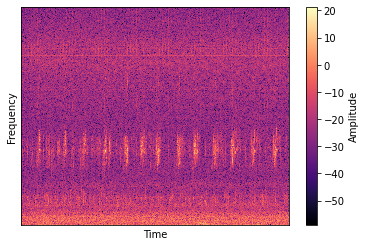

     recording_id  species_id  songtype_id  t_min   f_min    t_max   f_max
6129    ca0bf5f45          18            1   39.2  3187.5  39.8933  5062.5


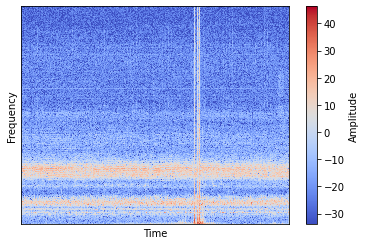

     recording_id  species_id  songtype_id    t_min    f_min   t_max   f_max
6140    ca8256b82           0            1  22.9013  5906.25  24.192  7500.0


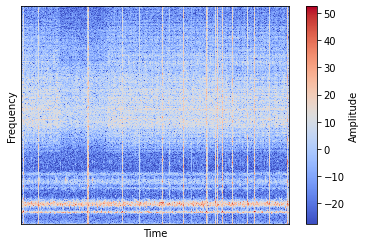

Empty DataFrame
Columns: [recording_id, species_id, songtype_id, t_min, f_min, t_max, f_max]
Index: []


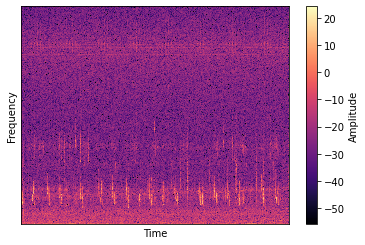

     recording_id  species_id  songtype_id    t_min    f_min    t_max   f_max
6130    ca27aadbb          21            1  34.7627  3281.25  35.8560  4125.0
6131    ca27aadbb           2            1  56.7467   468.75  58.5227  3000.0


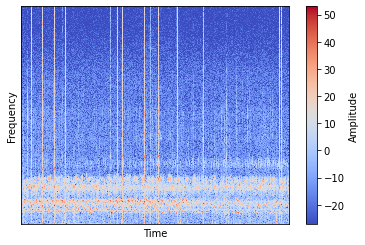

In [ ]:
for x in arr_files[:5]:
  data, samplerate = sf.read(dir + x)
  print(data_pd[data_pd['recording_id'] == x[:-5]])
  make_log_spectr(data, samplerate)

In [ ]:
def make_mel(data, samplerate):
  mel_spectrogram = lb.feature.melspectrogram(data, n_fft=n_fft, hop_length=hop_length, sr=samplerate)

  log_mel_spectrogram = lb.amplitude_to_db(mel_spectrogram)

  lb.display.specshow(log_mel_spectrogram, sr=samplerate, hop_length=hop_length)
  plt.xlabel('Time')
  plt.ylabel('MFCC')
  clb = plt.colorbar()
  clb.set_label('Volume') 
  plt.show() 

     recording_id  species_id  songtype_id   t_min   f_min    t_max   f_max
6128    ca06bba74          18            1  17.792  3187.5  18.4853  5062.5


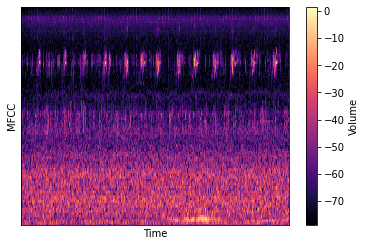

     recording_id  species_id  songtype_id  t_min   f_min    t_max   f_max
6129    ca0bf5f45          18            1   39.2  3187.5  39.8933  5062.5


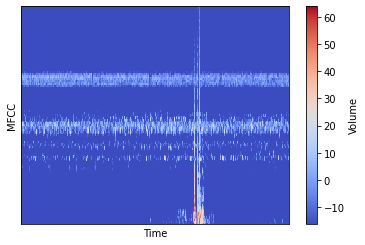

     recording_id  species_id  songtype_id    t_min    f_min   t_max   f_max
6140    ca8256b82           0            1  22.9013  5906.25  24.192  7500.0


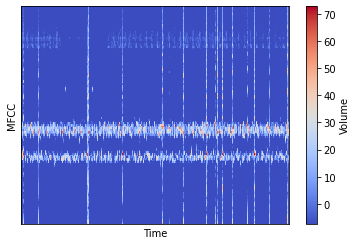

Empty DataFrame
Columns: [recording_id, species_id, songtype_id, t_min, f_min, t_max, f_max]
Index: []


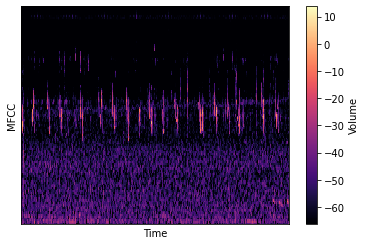

     recording_id  species_id  songtype_id    t_min    f_min    t_max   f_max
6130    ca27aadbb          21            1  34.7627  3281.25  35.8560  4125.0
6131    ca27aadbb           2            1  56.7467   468.75  58.5227  3000.0


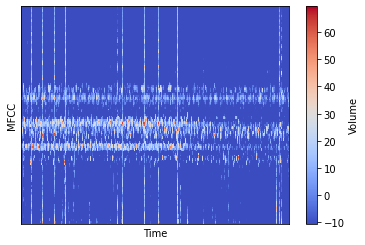

In [ ]:
for x in arr_files[:5]:
  data, samplerate = sf.read(dir + x)
  print(data_pd[data_pd['recording_id'] == x[:-5]])
  make_mel(data, samplerate)

### Prepare image

In [17]:
from skimage.transform import resize
import librosa as lb 
import librosa.display
from PIL import Image

In [7]:
def MinMaxScaling(ar):
  min_ar = min(ar.flatten())
  max_ar = max(ar.flatten())
  return (ar - min_ar)/(max_ar - min_ar)

In [11]:
def prepare_image(data, samplerate):
  n_fft = 2048 # number of samples per FFT (the duration of each slice)
  hop_length = 512 # shift

  stft = lb.core.stft(data, hop_length=hop_length, n_fft=n_fft)
  spectrogram = np.abs(stft)
  log_spectrogram = lb.amplitude_to_db(spectrogram)
  mel_spectrogram = lb.feature.melspectrogram(data, n_fft=n_fft, hop_length=hop_length, sr=samplerate)
  log_mel_spectrogram = lb.amplitude_to_db(mel_spectrogram)

  spectrogram = MinMaxScaling(resize(spectrogram, (224, 400))) 
  log_spectrogram = MinMaxScaling(resize(log_spectrogram, (224, 400)))
  log_mel_spectrogram = MinMaxScaling(resize(log_mel_spectrogram, (224, 400)))

  return np.stack((spectrogram, log_spectrogram, log_mel_spectrogram), axis=-1)

In [18]:
!mkdir /content/drive/MyDrive/MLDM_proj/test_img

In [19]:
img_dir = '/content/drive/MyDrive/MLDM_proj/test_img/'

In [33]:
for x in tqdm.tqdm(arr_files):
  data, samplerate = sf.read(dir + x)
  img = prepare_image(data, samplerate)
  im = Image.fromarray((img * 255).astype(np.uint8))
  im.save(img_dir + x[:-5] + ".jpeg")
  # plt.imshow(img);
  # plt.axis('off');
  # plt.show();

100%|██████████| 4727/4727 [2:47:28<00:00,  2.13s/it]


In [35]:
!du -h /content/drive/MyDrive/MLDM_proj/train

15G	/content/drive/MyDrive/MLDM_proj/train


In [38]:
!du -h /content/drive/MyDrive/MLDM_proj/train_img

58M	/content/drive/MyDrive/MLDM_proj/train_img


In [ ]:
!ls /content/drive/MyDrive/MLDM_proj/train

In [ ]:
!ls /content/drive/MyDrive/MLDM_proj/train_img

In [41]:
!cd /content/drive/MyDrive/MLDM_proj

In [44]:
!ls

drive  sample_data  train_images.tar.gz


In [ ]:
!tar -czvf train_images.tar.gz -C /content/drive/MyDrive/MLDM_proj/train_img .

In [46]:
!cp /content/train_images.tar.gz /content/drive/MyDrive/MLDM_proj/